<a href="https://colab.research.google.com/github/mffg1993/LabToolsForNewbiesWithPython/blob/main/ErrorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 📌 Introduction: Why Error Analysis?
In any experimental physics lab (especially optics), measurements are never perfect. To report meaningful results, you need to estimate how uncertain those results are.

 * Random errors – caused by
unpredictable fluctuations (e.g., electrical noise in a photodiode).

* Systematic errors – caused by consistent inaccuracies (e.g., misaligned lenses, offset calibration).

We’ll start by looking at statistical tools to analyze repeated measurements.

## 2. 📊 Basic Statistics for Repeated Measurements
Let’s simulate a simple lab scenario: repeated power readings (in milliwatts) from a laser using a photodetector.

In [1]:
import numpy as np

# Simulated power readings from a photodiode (in mW)
power_readings = np.array([1.02, 1.00, 1.05, 0.98, 1.01])

# Calculate statistics
mean_power = np.mean(power_readings)
std_dev = np.std(power_readings, ddof=1)  # Sample standard deviation
std_err = std_dev / np.sqrt(len(power_readings))  # Standard error of the mean

print(f"Mean Power: {mean_power:.3f} mW")
print(f"Standard Deviation: {std_dev:.3f} mW")
print(f"Standard Error of the Mean: {std_err:.3f} mW")


Mean Power: 1.012 mW
Standard Deviation: 0.026 mW
Standard Error of the Mean: 0.012 mW


## 3. 📈 Visualizing Errors with Error Bars
Suppose you're measuring laser power over time. Let's include error bars showing the standard deviation at each point.

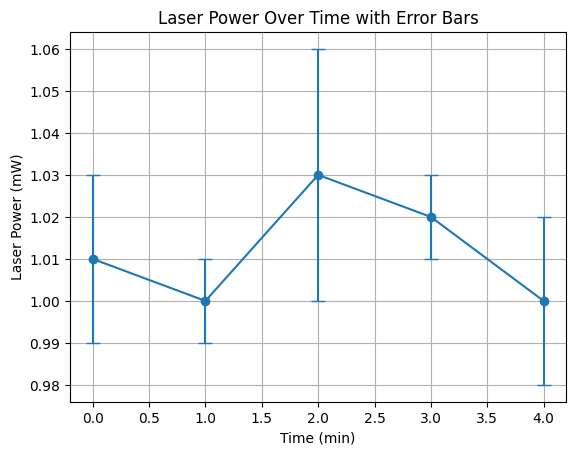

In [2]:
import matplotlib.pyplot as plt

times = np.array([0, 1, 2, 3, 4])  # time in minutes
means = np.array([1.01, 1.00, 1.03, 1.02, 1.00])
errors = np.array([0.02, 0.01, 0.03, 0.01, 0.02])  # standard deviation at each point

plt.errorbar(times, means, yerr=errors, fmt='o-', capsize=5)
plt.xlabel("Time (min)")
plt.ylabel("Laser Power (mW)")
plt.title("Laser Power Over Time with Error Bars")
plt.grid(True)
plt.show()


## 4. 🧮 Propagation of Uncertainty (Manual)
Example: Measuring the area of a laser spot
You measure:

Width = 2.0 ± 0.1 mm

Height = 3.0 ± 0.2 mm

What’s the uncertainty in the area?

In [3]:
w, dw = 2.0, 0.1  # width and its uncertainty
h, dh = 3.0, 0.2  # height and its uncertainty

area = w * h

# Propagation rule for multiplication:
dA = area * np.sqrt((dw / w)**2 + (dh / h)**2)

print(f"Area = {area:.2f} ± {dA:.2f} mm²")


Area = 6.00 ± 0.50 mm²


## 5. ⚙️ Propagation with the uncertainties Library
You can automate propagation using the uncertainties package.

This package is typically not installed but you can simply get by

```
pip install uncertainties
```



In [6]:
from uncertainties import ufloat
from uncertainties.umath import sqrt

# Define measured quantities
w = ufloat(2.0, 0.1)
h = ufloat(3.0, 0.2)

area = w * h
print(f"Area = {area} mm²")  # Will automatically include uncertainty


Area = 6.0+/-0.5 mm²


## 6. 📉 Weighted Least Squares Fit
Sometimes, each data point has a different uncertainty. You can account for this in your fit.

In [7]:
from scipy.optimize import curve_fit

# Model: linear
def linear(x, a, b):
    return a * x + b

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1.2, 2.1, 3.0, 4.1, 5.2])
y_err = np.array([0.1, 0.2, 0.1, 0.3, 0.2])  # uncertainty in y

# Fit with weights = 1/sigma^2
params, cov = curve_fit(linear, x_data, y_data, sigma=y_err, absolute_sigma=True)
a, b = params
da, db = np.sqrt(np.diag(cov))

print(f"Fit: y = ({a:.2f} ± {da:.2f})x + ({b:.2f} ± {db:.2f})")


Fit: y = (0.97 ± 0.05)x + (0.18 ± 0.13)


Plotting the fit:

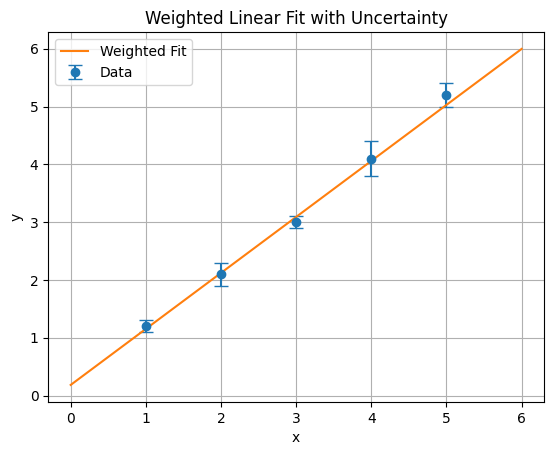

In [8]:
x_fit = np.linspace(0, 6, 100)
y_fit = linear(x_fit, *params)

plt.errorbar(x_data, y_data, yerr=y_err, fmt='o', label='Data', capsize=5)
plt.plot(x_fit, y_fit, label='Weighted Fit')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Weighted Linear Fit with Uncertainty")
plt.show()
